1)Load the scikit-learn version of the diabetes dataset into your Jupyter
notebook using the load_diabetes function.

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso


ds = load_diabetes() #Default Dataset for diabetes
features= ds.data #Dataset features
labels = ds.target #Dataset labels


2. Split the dataset into the training and test sets. You may use the function
train_test_split in scikit-learn. Here and below use your birthday
(in the format DDMM omitting leading zeros if any) as random_state.


In [2]:
training_x,test_x,training_y,test_y = train_test_split(features, labels,test_size = 0.25, random_state = 210) # splitting the dataset
l_df = Lasso(alpha = 1.0) #Lasso model
l_df.fit(training_x,training_y) #Lasso Model fitting


# Lasso's default parameter is alpha and the default value of alpha is one
#We are doing supervised learning here
x_predict= l_df.predict(training_x) #Predicting the training dataset
x1_predict= l_df.predict(test_x) #Predicting the test dataset

3. What is the training and test R2
for the Lasso model using the default
parameters? How many features does this model use? What are the names
of those features? Write the answers in your Jupyter notebook. Here and
below, you are allowed to use any scikit-learn functions. (You may also
use numpy and matplotlib functions.)


In [3]:
#training and test R2
RR1= r2_score(training_y,x_predict) #Predicting the training r2 score
RR2 = r2_score(test_y,x1_predict) #predicting the test r2 score

In [4]:
RR1

0.35474379383769117

In [5]:
RR2

0.3676749332056657

In [6]:
#The features that are used in lasso method are
ds.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
#WHAT FEATURES USED  on lasso method
coeff = l_df.coef_ #coef is the method used to check the coefficients in lasso model, based on this value the parameters that are used get to know
coeff
#There are only 2 positive values and that three positive features are in the positions 3,4,9
#The positive values are 387.9357373,  300.94576619 
#features are 'bmi', 's5'


array([  0.        ,  -0.        , 387.9357373 ,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       300.94576619,   0.        ])

4) Now load the original diabetes dataset from the web page given above.
Download the file
Tab-delimited diabetes data (text file)
by right-clicking on it. All the remaining tasks should be performed using
this file (diabetes.data), which is the original diabetes dataset. The
labels are given in the last column of the file diabetes.data.

In [8]:
data1 = pd.read_csv('/content/diabetes.data', delimiter='\t') # Loading the original dataset by uploading the file given in moodle 

5. Split the dataset into the training and test sets. Use your birthday (in the
format DDMM) as random_state.


In [9]:
labels_originaldataset = data1['Y'] #extracting the labels from dataset
features_originaldataset = data1[['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6']] #Extracting the features from dataset
training_x_originaldataset,test_x_originaldataset,training_y_originaldataset,test_y_originaldataset = train_test_split(features_originaldataset, labels_originaldataset,test_size = 0.25, random_state = 210) #Splitting the dataset

6. Repeat item 3 for the current dataset. Comment on the differences from
what you saw in item 3.

In [10]:
l_df_originaldataset = Lasso(alpha = 1.0) #Model for original dataset
l_df_originaldataset.fit(training_x_originaldataset,training_y) #Fitting the original dataset
x_predict= l_df_originaldataset.predict(training_x_originaldataset) #Predicting the training dataset
x1_predict= l_df_originaldataset.predict(test_x_originaldataset) #Predicting the test dataset

#training and test R2
RR1_originaldataset= r2_score(training_y_originaldataset,x_predict) #Getting the score for Training dataset 
RR2_originaldataset = r2_score(test_y_originaldataset,x1_predict) #Getting the score for test dataset original

In [11]:
RR1_originaldataset

0.5096235919105848

In [12]:
RR2_originaldataset

0.5022855939113965

7)Preprocess the training and test sets in the same way and avoiding data snooping. Use StandardScaler.


In [13]:
from sklearn.preprocessing import StandardScaler #importing the libraries for standard scalar
std = StandardScaler() #instance for standard scalar
std.fit(training_x_originaldataset) # doing the normalisation
#w eapply transform on features only.
#we transform trainig_x only training data
std1 = std.transform(training_x_originaldataset) #applying the transformation for traing dataset
#we do transform for testing as well
std2 = std.transform(test_x_originaldataset) #applying the transformation for test dataset

In [14]:
#8th
l_df_afterscaling = Lasso(alpha = 1.0) #Model after scaling and transformation
l_df_afterscaling.fit(std1,training_y_originaldataset) #fitting the traing


# Lasso's default parameter is alpha and the default value of alpha is one
#We are doing supervised learning here
x_predict= l_df_afterscaling.predict(std1) # predicting the training 
x1_predict= l_df_afterscaling.predict(std2) #predicting the test

#training and test R2
RR1_afterscaling= r2_score(training_y_originaldataset,x_predict) #Training R2 
RR2_afterscaling = r2_score(test_y_originaldataset,x1_predict) # Test  R2

In [15]:
RR1_afterscaling

0.5122134281592892

In [16]:
RR2_afterscaling

0.5116878861038713

8. Repeat item 3 for the current training and test sets (which you should
use in items 8–10). Are your current results closer to those in item 3 or
item 6? Notice that a priori you would expect your current results to be
closer to those in item 3, since the reason for different results in items 3
and 6 was that the former were for normalized data while the latter were
for the original data. Is this expectation confirmed? If not, why?


ANSWER: Both scores are confirmed and are different because we used the standard scalar on the data and hence we got different r2_scores for item 3 and item 6

9. Varying the regularization parameter α in the Lasso, plot the test R2 vs
the number of features used (i.e., those with non-zero coefficients). Try to
make your plot as pretty as possible. (Obviously, it’s subjective.) Which
point on the curve do you prefer? (There is no unique correct answer to
this question.) Give a brief explanation of your preference.

In [17]:
best_score = 0 # best score initial assigned to zero
scores = [] #Scores
testr2scores = [] #test R2 scores
parameters = [] #number of features
for alpha1 in [ 0.001,0.005, 0.9, 1, 10, 20, 100]:
    # for each combination of parameters, train an Lasso
    lass_path = Lasso(alpha=alpha1) #Model Building
    lass_path.fit(std1, training_y_originaldataset) #model fitting
    # evaluate the lasso on the test set
    score = lass_path.score(std2, test_y_originaldataset) #Evaluation
    scores.append(score) #appending
    Y_predict= lass_path.predict(std2) #predicting
    testr2Score = r2_score(test_y_originaldataset,Y_predict) #R2 score
    testr2scores.append(testr2Score) # 
    score11 = lass_path.coef_
    features_count1 = np.sum(score11>0)
    parameters.append(features_count1)
    # if we got a better score, store the score and parameters
    if score > best_score:
      best_score = score
      best_alpha = alpha1
print("Best score:", best_score) #best score
print("Best parameters alpha:",best_alpha) #best alpha

Best score: 0.5116878861038713
Best parameters alpha: 1


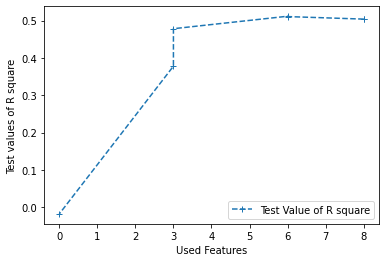

In [18]:
import matplotlib.pyplot as plt #Library
plt.plot(parameters,testr2scores,"+--",label="Test Value of R square") #plotting the graph
plt.xlabel("Used Features")
plt.ylabel("Test values of R square")
plt.legend()

from the above graphh, ideal number of features are 6 that are used in the laso method, because thats where the best score is achieved. 

10. Choose the regularization parameter for the Lasso using cross-validation
on the training set. Train the Lasso on the whole training set using the
chosen values of the parameters. Report the resulting training and test
R2 and the number of features used. (As before, you are allowed to use
any scikit-learn functions.)


In [19]:
# split train set into train set proper and validation set
training_x_pr, valid_x, training_y_pr, valid_y = train_test_split(std1, training_y_originaldataset, random_state=210)
print("Sizes of train_pr, valid, and test sets: ", training_x_pr.shape[0], valid_x.shape[0], test_x.shape[0])
best_score = 0
scores_valid = []
trainr2scores_CV = []
testr2scores_CV = []
parameters_all = []
trainscores = []
testscores = []
for alpha1 in [0.001, 0.01, 0.1, 1, 10, 100]:

    # for each combination of parameters, train an Lasso
    lass_path = Lasso(alpha = alpha1)  #Model Building
    lass_path.fit(training_x_pr, training_y_pr) #model fitting

    train_predict= lass_path.predict(training_x_pr) #Pedicting
    test_predict= lass_path.predict(valid_x) #predicting

    trainscore = lass_path.score(training_x_pr, training_y_pr) #Checking score
    trainscores.append(trainscore) #appending

    testscore = lass_path.score(training_x_pr, training_y_pr) #Checking score
    testscores.append(testscore) #appending

    trainr2Score = r2_score(training_y_pr,train_predict) #R2 score
    trainr2scores_CV.append(trainr2Score) #appending the value

    testr2Score = r2_score(valid_y,test_predict) #R2 score 
    testr2scores_CV.append(testr2Score) #appending
    
    score11 = lass_path.coef_ # Coefficient
    features_count1 = np.sum(score11>0) #Summing the value to get possitive coefficients
    parameters_all.append(features_count1) #appending the parameters
    # evaluate the Lasso on the validation set
    score = lass_path.score(valid_x, valid_y) #cscore
    # if we got a better score, store the score and parameters
    if score > best_score:
      best_score = score
      best_alpha = alpha1
    
# rebuild a model on the  training set, and evaluate it on the test set
lass_path = Lasso(alpha=best_alpha) #Model Building
lass_path.fit(training_x_pr, training_y_pr) ##model fitting
valid_score = lass_path.score(valid_x,valid_y) #score
print("Best score on validation set:", best_score)
print("Best parameter is alpha:", best_alpha)
print("Validation set score with best parameters:", valid_score)

Sizes of train_pr, valid, and test sets:  248 83 111
Best score on validation set: 0.4675679005660107
Best parameter is alpha: 1
Validation set score with best parameters: 0.4675679005660107


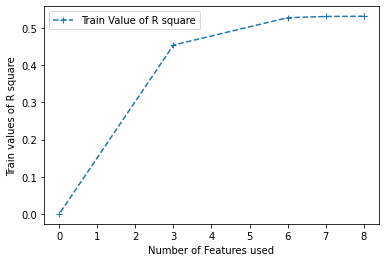

In [20]:
#Traing Set
plt.plot(parameters_all,trainr2scores_CV,"+--",label="Train Value of R square")
plt.xlabel("Number of Features used")
plt.ylabel("Train values of R square")
plt.legend()

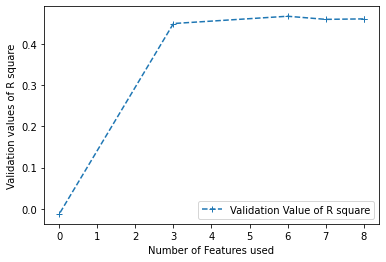

In [21]:
#Validation Set
plt.plot(parameters_all,testr2scores_CV,"+--",label="Validation Value of R square")
plt.xlabel("Number of Features used")
plt.ylabel("Validation values of R square")
plt.legend()

10. Choose the regularization parameter for the Lasso using cross-validation
on the training set. Train the Lasso on the whole training set using the
chosen values of the parameters. Report the resulting training and test
R2 and the number of features used. (As before, you are allowed to use
any scikit-learn functions.)

In [22]:
#10.lASSO WITH CROSS VALIDATION
# using the RepeatedKFold function
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
best_score = 0
scores_valid_CV = []
for alpha1 in [0.0001, 0.001, 0.01, 0.1, 10, 100]:
    # for each combination of parameters,
    # train an LASSO
    lass_path = Lasso(alpha = alpha1)  #Model Building
    # perform cross-validation
     
    scores = cross_val_score(lass_path, std1, training_y_originaldataset, cv=6) 
    scores_valid_CV.append(scores)
    #print(scores)
    #cv means sampling the data set into 5 parts with 4 training samples and 1 testing samples
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    scores_valid_CV.append(score)

    
       # if we got a better score, store the score and parameters
    if score > best_score:
      best_score = score
      best_alpha = alpha1
# rebuild a model on the full training set
lass_path = Lasso(alpha = best_alpha)  #Model Building
lass_path.fit(std1,training_y_originaldataset)
testpreds = lass_path.predict(test_x_originaldataset)
test_score = lass_path.score(std2, test_y_originaldataset) #score here is a method of lasso class
testr2Score = r2_score(test_y_originaldataset,testpreds)
print("Best CV score:", best_score)
print("Best parameters alpha is :",best_alpha)
print("Test set score with best parameters:", test_score)
print("Test R2 Score",testr2Score )

Best CV score: 0.4812195767911683
Best parameters alpha is : 0.0001
Test set score with best parameters: 0.5039000849777067
Test R2 Score -790.0796249550024


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [23]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)
grid_search.fit(std1,training_y_originaldataset)
grid_search.score(std2, test_y_originaldataset)

0.5049339293135084

In [24]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.1}
0.47987559634961785


In [25]:
grid_search.best_estimator_

Lasso(alpha=0.1)

11. Implement an inductive conformal predictor as follows:

(a) Split the training set that you obtained in item 5 into two parts:
the calibration set of size 99 and the rest of the training set (the
training set proper). Use your birthday (in the format DDMM) as
random_state.


In [26]:
training_x,test_x,training_y,test_y = train_test_split(features_originaldataset, labels_originaldataset,test_size = 0.25, random_state = 210)
train_data_x, caliberation_x ,train_data_y, caliberation_y = train_test_split(training_x,training_y,test_size = 99 , random_state = 210)

(b) Preprocess the training set proper, calibration set, and test set in
the same way using StandardScaler. Namely, fit the scaler to the
training set proper and then use it to transform all three.

In [27]:
#b)
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
std_sc.fit(train_data_x)
#we apply transform on features only.
#we transform trainig_x only training data
std3 = std_sc.transform(train_data_x)
#we do transform for new caliberation and test as well
std4 = std_sc.transform(caliberation_x)
std5 = std_sc.transform(test_x)

(c) Using the nonconformity measure α = |y − yˆ|, where y is the true
label and ˆy is its prediction given the training set proper, for each test
sample compute the prediction interval for it. Do this for significance
levels 5% and 20%. For each of these significance levels compute:

-the length of the prediction intervals for the test samples
and the test error rate of your inductive conformal predictor1.

-For computing the predictions ˆy, use the Lasso with parameters choosen by cross-validation on the training set prope

In [28]:
#c)
#0.0001, 0.001, 0.01, 0.1, 10, 100
l_df = Lasso(alpha = 1.0)
l_df.fit(std3,train_data_y)


# Lasso's default parameter is alpha and the default value of alpha is one
#We are doing supervised learning here
x_predict= l_df.predict(std3)
x1_predict= l_df.predict(std4)

#training and test R2
RR1= r2_score(train_data_y,x_predict)
RR2 = r2_score(caliberation_y,x1_predict)


In [29]:
RR1

0.5467463611636524

In [30]:
RR2

0.4241872525663236

In [31]:
alpha2 = abs(np.subtract(train_data_y ,x_predict))
alpha3 = sorted(alpha2) #new sorted values

In [32]:
alpha2[220]
#k = (1-e)(m+1) ---- e is signified factor
k = (1-0.05)*(232+1)
alpha3[222]
#len(test_x)

98.72645150988811

In [33]:
#0.0001, 0.001, 0.01, 0.1, 10, 100
#l_df = Lasso(alpha = 1.0)
# Lasso's default parameter is alpha and the default value of alpha is one
#We are doing supervised learning here
train_predict= l_df.predict(std3)
calib_predict= l_df.predict(std4)
test_predict = l_df.predict(std5)

#training and test R2
RR1= r2_score(train_data_y,x_predict)
RR2 = r2_score(caliberation_y,x1_predict)

In [34]:
#conformaative measures for test scores
test_alpha = abs(np.subtract(test_y,test_predict))
test_alpha1 =sorted(test_alpha)

In [35]:
test_k1 = (1-0.05)*(111+1)
test_k2 = (1-0.20)*(111+1)

In [36]:
c05 = test_alpha1[int(test_k1)]
c20 = test_alpha1[int(test_k2)]

In [37]:
prediction_intervals = []
#for the given sample this is the prediction interval for e value 0.05
for i in test_predict:
  print(i)
  predict_int05 = [i+c05,i-c05]
  print(predict_int05)
  #This is the length of the test sample range
  leng = predict_int05[1]-predict_int05[0]
  #length of prediction interval of the test sample is 207
  prediction_intervals.append(leng)
  print(leng)

111.41525385560368
[218.56675915673344, 4.263748554473921]
-214.30301060225952
253.8549648734575
[361.00647017458726, 146.70345957232774]
-214.30301060225952
154.84849469887024
[262.0, 47.69698939774048]
-214.30301060225952
179.0383015319024
[286.18980683303215, 71.88679623077263]
-214.30301060225952
277.8047411444045
[384.95624644553425, 170.65323584327473]
-214.30301060225952
97.67129265357588
[204.82279795470563, -9.480212647553884]
-214.30301060225952
147.8740702994388
[255.02557560056857, 40.72256499830905]
-214.30301060225952
175.48936463364387
[282.6408699347736, 68.33785933251411]
-214.3030106022595
53.60012558505022
[160.75163088617998, -53.55137971607954]
-214.30301060225952
65.17411726784093
[172.3256225689707, -41.97738803328883]
-214.30301060225952
147.76222757324732
[254.91373287437708, 40.610722272117556]
-214.30301060225952
160.50404354659594
[267.6555488477257, 53.35253824546618]
-214.30301060225952
240.08610172089305
[347.2376070220228, 132.9345964197633]
-214.3030106

In [38]:
#for the given sample this is the prediction interval for e value 0.20
for i in test_predict: #for loop
  print(i)
  predict_int20 = [i+c20,i-c20]
  print(predict_int20)
  leng = predict_int20[1]-predict_int20[0]
  #length of prediction interval of the test sample is 140
  prediction_intervals.append(leng)
  print(leng)

111.41525385560368
[175.1867958582468, 47.64371185296058]
-127.54308400528622
253.8549648734575
[317.6265068761006, 190.0834228708144]
-127.54308400528623
154.84849469887024
[218.62003670151336, 91.07695269622714]
-127.54308400528622
179.0383015319024
[242.8098435345455, 115.26675952925929]
-127.54308400528622
277.8047411444045
[341.5762831470476, 214.03319914176137]
-127.54308400528623
97.67129265357588
[161.44283465621896, 33.89975065093277]
-127.54308400528619
147.8740702994388
[211.64561230208193, 84.10252829679571]
-127.54308400528622
175.48936463364387
[239.26090663628696, 111.71782263100077]
-127.54308400528619
53.60012558505022
[117.37166758769332, -10.17141641759288]
-127.5430840052862
65.17411726784093
[128.94565927048404, 1.4025752651978252]
-127.54308400528622
147.76222757324732
[211.5337695758904, 83.99068557060421]
-127.54308400528619
160.50404354659594
[224.27558554923905, 96.73250154395284]
-127.54308400528622
240.08610172089305
[303.85764372353617, 176.31455971824994]


In [39]:
def errorcheck(original, predicted): #Metod For error
    error = original - predicted #caluculating the error
    losscheck = (np.mean(np.sum(error) / original.size))/100 #checking the loss
    return losscheck

In [40]:
errorcheck(test_y,test_predict) # Test Error 

0.021871009088295236